# Car price prediction case study

#### The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model

#### Data description
The business meaning of each column in the data is as below

Price: The Price of the car in dollars

Age: The age of the car in months

KM: How many KMS did the car was used

FuelType: Petrol/Diesel/CNG car

HP: Horse power of the car

MetColor: Whether car has metallic color or not

Automatic: Whether car has automatic transmission or not

CC: The engine size of the car

Doors: The number of doors in the car

Weight: The weight of the car

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/kshit/Downloads/Live classes/CarPricesData.csv')
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [4]:
data.shape

(1436, 10)

In [5]:
data.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [7]:
data.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1432,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.986750,68533.259749,NaN,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,NaN,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [8]:
data.isna().sum()   #isnull()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [9]:
data.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [10]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [11]:
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


In [12]:
### EDA

In [13]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [14]:
data.HP.value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

In [15]:
# def plots(data,colstoplot):
#         fig,subplot=plt.subplot(nrows=1,ncols = len(colstoplot),figsize=(20,6))
#         fig.suptitle('Bar charts of:' +str(colstoplot))
        
#         for i,j in zip(colstoplot,range(len(colstoplot))):
#             data.groupby(i).size().plot(kind='bar',ax=subplot[j])

In [16]:
# plots(data=data,colstoplot=['FuelType','HP','Metcolor','Automatic','CC','Doors'])

In [17]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

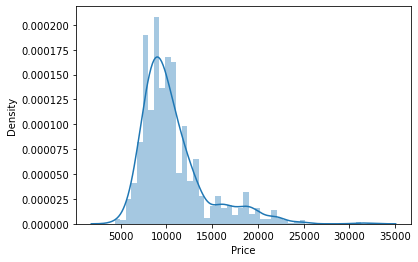

In [18]:
sns.distplot(data.Price)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

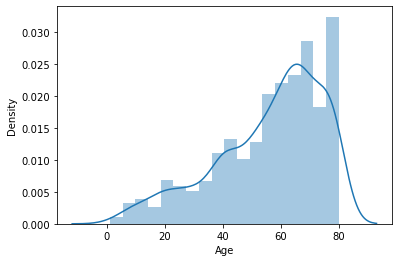

In [19]:
sns.distplot(data.Age)

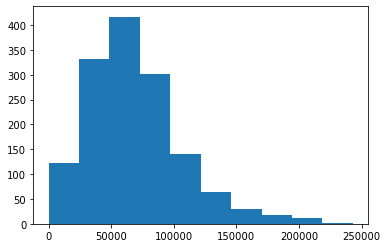

In [20]:
plt.hist("KM",data = data)
plt.show()

In [21]:
data.KM.value_counts()

36000    9
1        8
43000    7
59000    7
75000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: KM, Length: 1263, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FuelType', ylabel='count'>

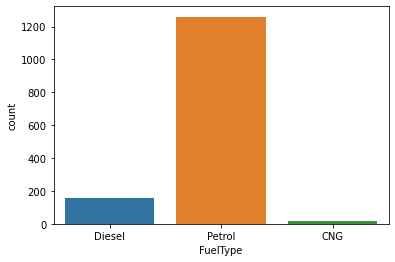

In [22]:
sns.countplot('FuelType',data = data )

In [23]:
data.FuelType.value_counts()

Petrol    1260
Diesel     155
CNG         17
Name: FuelType, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

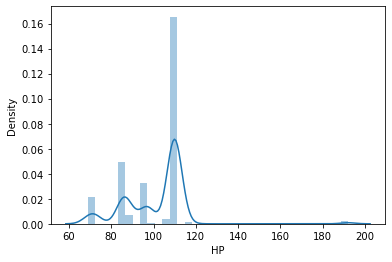

In [25]:
sns.distplot(data.HP)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MetColor', ylabel='count'>

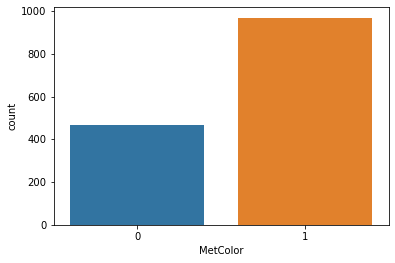

In [26]:
sns.countplot("MetColor",data = data)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Automatic', ylabel='count'>

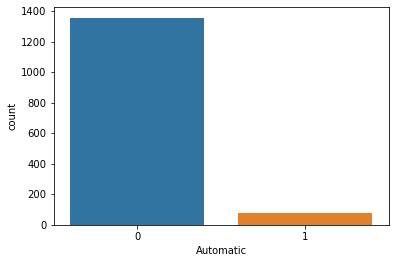

In [27]:
sns.countplot("Automatic",data = data)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC', ylabel='count'>

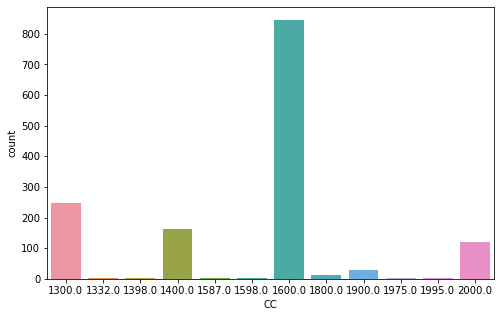

In [28]:
plt.figure(figsize = (8,5))
sns.countplot(data.CC)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors', ylabel='count'>

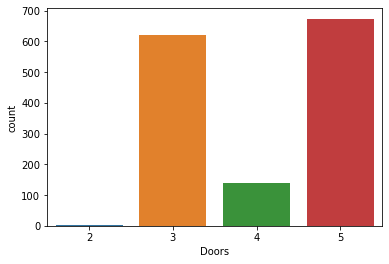

In [29]:
sns.countplot('Doors',data = data)

<AxesSubplot:>

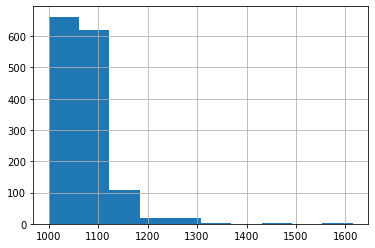

In [30]:
data.Weight.hist()

# Bivarient analysis

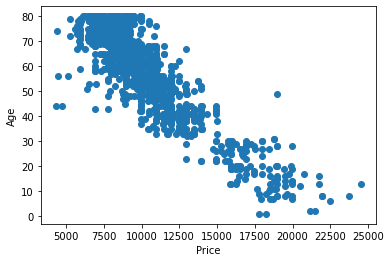

In [48]:
plt.scatter(x='Price',y = 'Age',data =data)
plt.xlabel('Price')
plt.ylabel('Age')
plt.show()

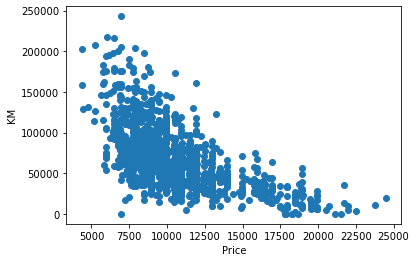

In [50]:
plt.scatter(x='Price',y = 'KM',data =data)
plt.xlabel('Price')
plt.ylabel('KM')
plt.show()

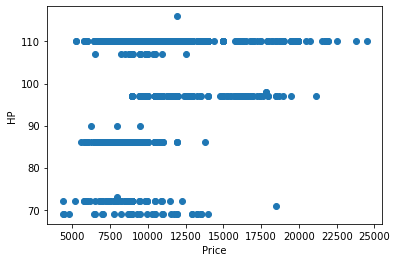

In [66]:
plt.scatter(x='Price',y='HP',data =data)
plt.xlabel('Price')
plt.ylabel('HP')
plt.show()

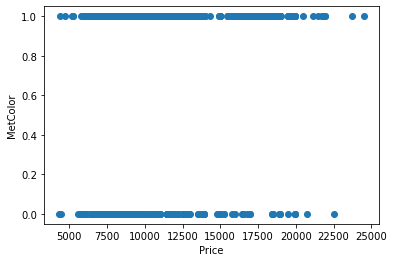

In [69]:
plt.scatter(x='Price',y='MetColor',data =data)
plt.xlabel('Price')
plt.ylabel('MetColor')
plt.show()

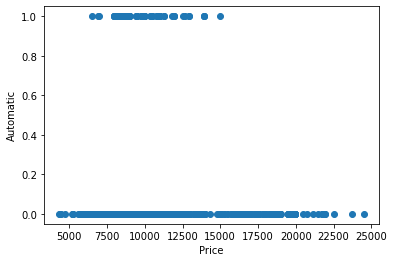

In [70]:
plt.scatter(x='Price',y='Automatic',data =data)
plt.xlabel('Price')
plt.ylabel('Automatic')
plt.show()

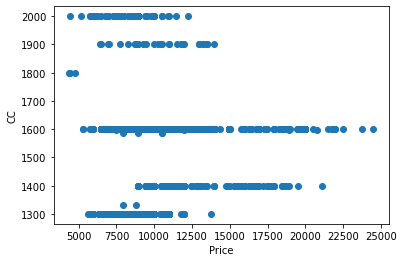

In [71]:
plt.scatter(x='Price',y='CC',data =data)
plt.xlabel('Price')
plt.ylabel('CC')
plt.show()

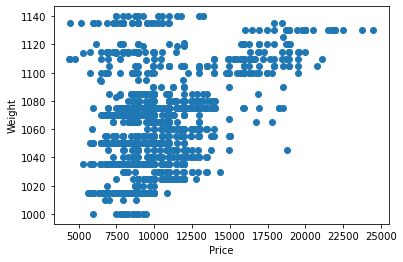

In [72]:
plt.scatter(x='Price',y='Weight',data =data)
plt.xlabel('Price')
plt.ylabel('Weight')
plt.show()

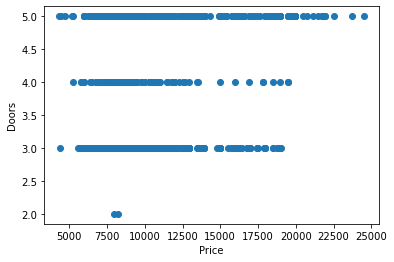

In [75]:
plt.scatter(x='Price',y='Doors',data =data)
plt.xlabel('Price')
plt.ylabel('Doors')
plt.show()

In [31]:
## outliers

data.Weight.describe()

count    1434.000000
mean     1072.487448
std        52.672475
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

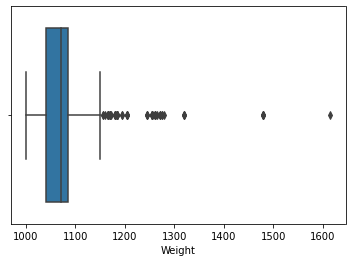

In [32]:
sns.boxplot(data.Weight)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

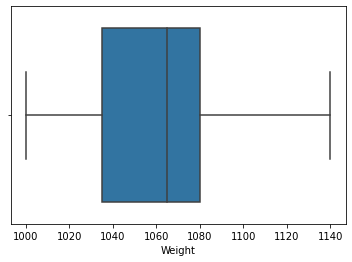

In [33]:
data=data[data['Weight']<1150]
sns.boxplot(data.Weight)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

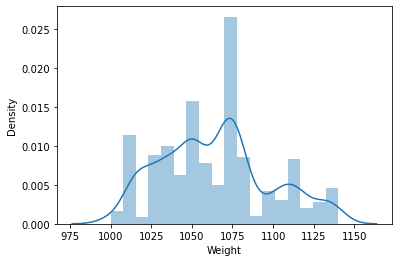

In [34]:
sns.distplot(data.Weight)

In [76]:
##missing value treatment

In [77]:
data.isna().sum()

Price        0
Age          2
KM           0
FuelType     3
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       0
dtype: int64

In [78]:
data[data.Age.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [79]:
data.Age.fillna(0,inplace = True)

C:\Users\kshit\AppData\Local\Temp\ipykernel_15204\1360653843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age.fillna(0,inplace = True)


In [80]:
data.isna().sum()

Price        0
Age          0
KM           0
FuelType     3
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       0
dtype: int64

In [81]:
data[data.FuelType.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
474,10450,48.0,64193,NaN,110,1,0,1600.0,3,1040.0
686,8950,65.0,100550,NaN,110,1,0,1600.0,5,1075.0
1423,7950,80.0,35821,NaN,86,0,1,1300.0,3,1015.0


In [82]:
data.FuelType.fillna('NA',inplace=True)

C:\Users\kshit\AppData\Local\Temp\ipykernel_15204\2093027534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.FuelType.fillna('NA',inplace=True)


In [83]:
data[data.CC.isna()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1392,7500,79.0,49827,Petrol,86,1,0,NaN,5,1035.0
1401,8950,71.0,47633,Petrol,110,1,0,NaN,5,1075.0


In [84]:
data['CC']=np.where(data['HP']==110,1600.0,data['CC'])
data['CC']=np.where(data['HP']==86,1300.0,data['CC'])

C:\Users\kshit\AppData\Local\Temp\ipykernel_15204\3237792382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CC']=np.where(data['HP']==110,1600.0,data['CC'])
C:\Users\kshit\AppData\Local\Temp\ipykernel_15204\3237792382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CC']=np.where(data['HP']==86,1300.0,data['CC'])


In [85]:
data.loc[1392]

Price          7500
Age            79.0
KM            49827
FuelType     Petrol
HP               86
MetColor          1
Automatic         0
CC           1300.0
Doors             5
Weight       1035.0
Name: 1392, dtype: object

In [86]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [87]:
data.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.879118,-0.598447,0.229229,0.107950,-0.029610,-0.012986,0.201637,0.435891
Age,-0.879118,1.000000,0.503338,-0.102598,-0.104782,0.091600,0.000617,-0.151186,-0.390328
KM,-0.598447,0.503338,1.000000,-0.326902,-0.067687,-0.053640,0.358502,-0.051427,0.067037
HP,0.229229,-0.102598,-0.326902,1.000000,0.084814,0.001982,0.040460,0.140813,0.009341
MetColor,0.107950,-0.104782,-0.067687,0.084814,1.000000,-0.018161,0.030212,0.083052,0.073556
Automatic,-0.029610,0.091600,-0.053640,0.001982,-0.018161,1.000000,-0.066563,-0.045524,0.051311
CC,-0.012986,0.000617,0.358502,0.040460,0.030212,-0.066563,1.000000,0.129484,0.676797
Doors,0.201637,-0.151186,-0.051427,0.140813,0.083052,-0.045524,0.129484,1.000000,0.437815
Weight,0.435891,-0.390328,0.067037,0.009341,0.073556,0.051311,0.676797,0.437815,1.000000


<AxesSubplot:>

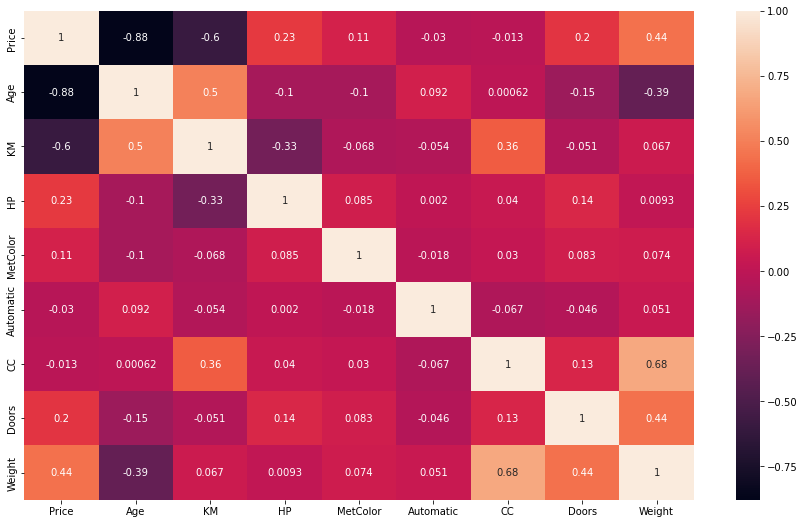

In [88]:
plt.figure(figsize = (15,9) )
sns.heatmap(data.corr(),annot=True)

->Price is positively correlated with HP, Metcolor and Weight and negatively correlated with Age, KM,Automatic and CC.

->The price of petrol car is comparatively higher than Deisel and CNG car.




In [89]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0
17,17950,24.0,21716,Petrol,110,1,0,1600.0,3,1105.0
18,16750,24.0,25563,Petrol,110,0,0,1600.0,3,1065.0
19,16950,30.0,64359,Petrol,110,1,0,1600.0,3,1105.0
20,15950,30.0,67660,Petrol,110,1,0,1600.0,3,1105.0


In [90]:
data=pd.get_dummies(data)
data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,17950,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,16750,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,16950,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,15950,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1


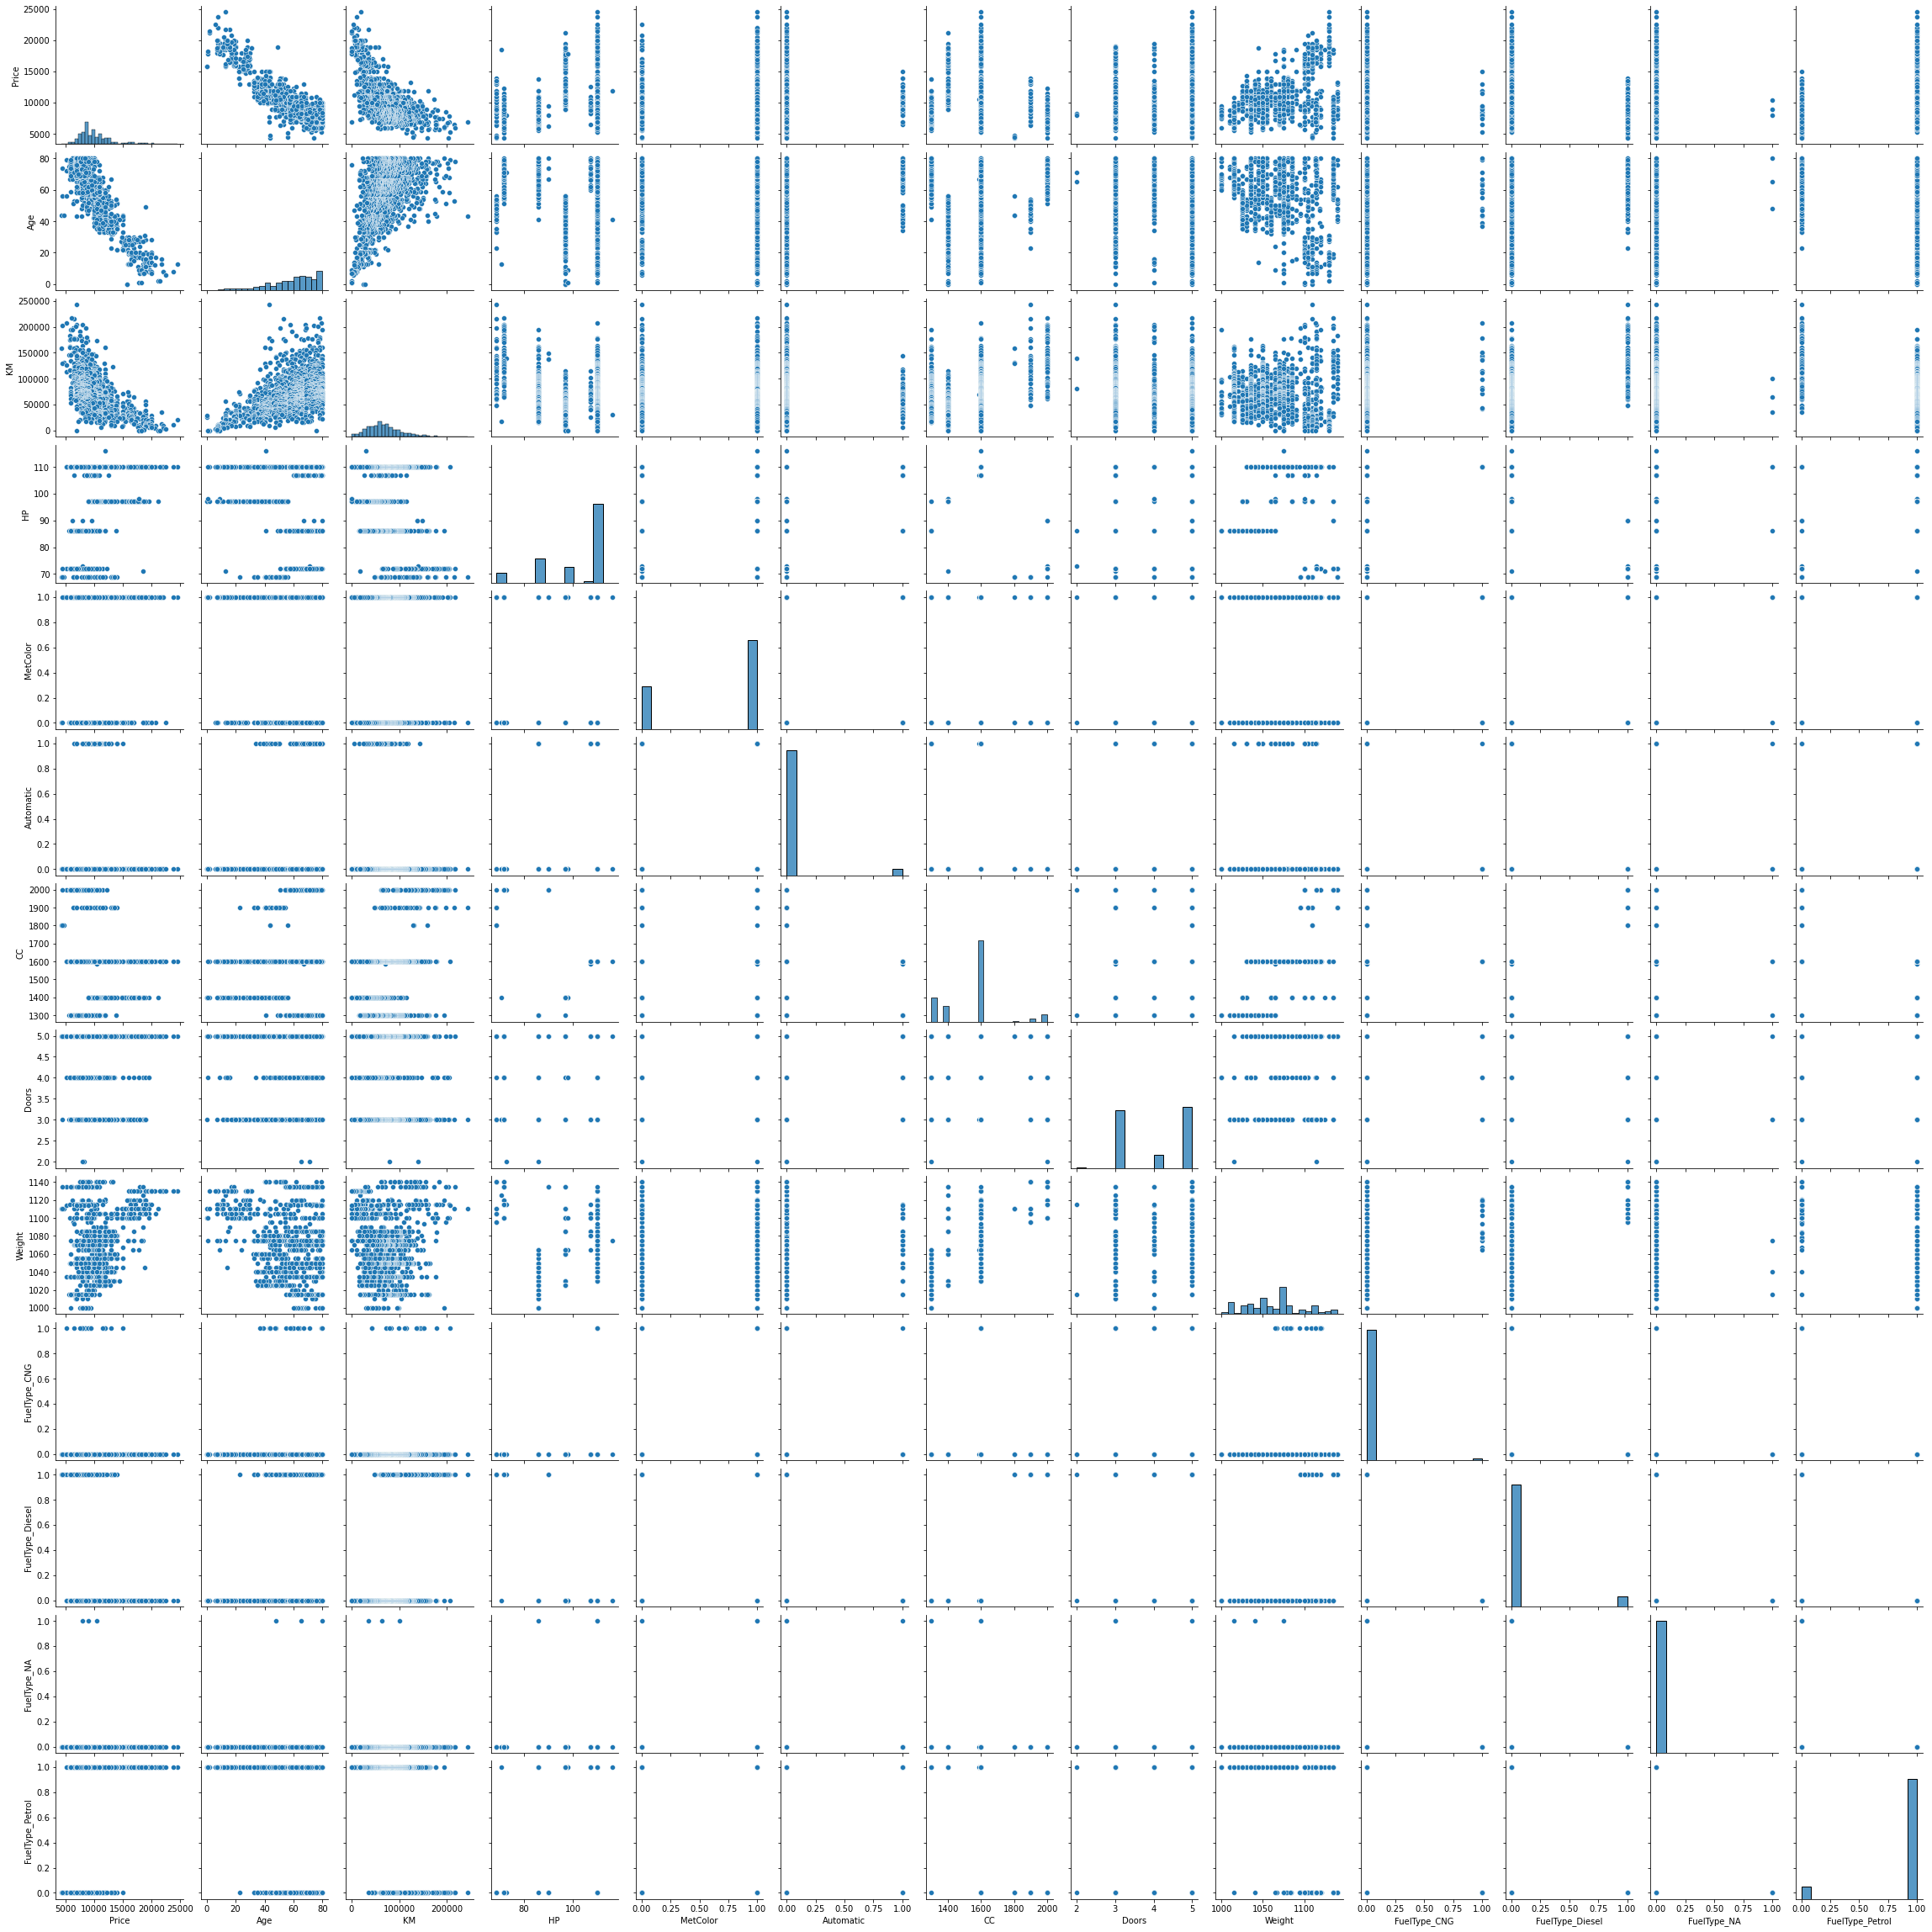

In [91]:
sns.pairplot(data=data)

In [92]:
x=data.drop(columns='Price')
y=data['Price']

In [93]:
x.head(2)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1


In [94]:
## train and test split

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
pred = MinMaxScaler()
fit= pred.fit(x)
x= fit.transform(x)
x

array([[0.2875    , 0.29274606, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.3       , 0.08936251, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.3       , 0.10519385, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8875    , 0.07002086, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.875     , 0.06960934, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.95      , 0.        , 0.87234043, ..., 0.        , 0.        ,
        1.        ]])

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [99]:
x_train

array([[0.8625    , 0.30688192, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.9       , 0.36419491, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.925     , 0.65805621, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.975     , 0.29666377, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7625    , 0.56360314, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7125    , 0.33114951, 0.87234043, ..., 0.        , 0.        ,
        1.        ]])

In [100]:
x_test

array([[0.875     , 0.35802205, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.775     , 0.36213729, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       [0.925     , 0.50648768, 0.36170213, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8125    , 0.34797263, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.9875    , 0.40634324, 0.87234043, ..., 0.        , 0.        ,
        1.        ],
       [0.7625    , 0.18352339, 0.36170213, ..., 0.        , 0.        ,
        1.        ]])

In [101]:
##Modeling

from sklearn.linear_model import LinearRegression

RegModel = LinearRegression()
fit= RegModel.fit(x_train,y_train)
y_pred=fit.predict(x_test)

In [102]:
pd.DataFrame(y_pred)

,0
0,7919.508048
1,8768.834842
2,6743.689488
3,10702.649756
4,9466.531229
...,...
268,12777.311554
269,9004.252894
270,10903.365087
271,7928.360325


In [103]:
pd.DataFrame(y_test)

,Price
1208,7950
724,6900
1103,7950
989,9950
867,9750
...,...
313,11650
659,10500
734,10950
1159,8750


In [104]:
from sklearn import metrics

In [105]:
print('R2 score',metrics.r2_score(y_test,y_pred) )

R2 score 0.847187007709763


In [106]:
## Model 2
from sklearn.tree import DecisionTreeRegressor


RegModel = DecisionTreeRegressor()
fit= RegModel.fit(x_train,y_train)
y_pred=fit.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred) )
pd.DataFrame(y_pred)

R2 score 0.7825629766647177


,0
0,7450.0
1,8750.0
2,7350.0
3,10495.0
4,9950.0
...,...
268,12400.0
269,9950.0
270,10500.0
271,9500.0


In [107]:
pd.DataFrame(y_test)

,Price
1208,7950
724,6900
1103,7950
989,9950
867,9750
...,...
313,11650
659,10500
734,10950
1159,8750


In [108]:
### Model3
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor()
fit= RegModel.fit(x_train,y_train)
y_pred=fit.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred) )
pd.DataFrame(y_pred)

R2 score 0.8746950525310476


,0
0,7689.00
1,9064.10
2,7148.90
3,9803.95
4,10004.50
...,...
268,12333.95
269,9486.50
270,9899.75
271,8010.60


In [109]:
## model4
from sklearn.ensemble import AdaBoostRegressor
DTR = RandomForestRegressor()
model = AdaBoostRegressor(n_estimators=100,base_estimator=DTR, learning_rate =0.04)


fit= model.fit(x_train,y_train)
y_pred=fit.predict(x_test)
print('R2 score',metrics.r2_score(y_test,y_pred) )
pd.DataFrame(y_pred)

R2 score 0.8776726230639169


,0
0,7852.99
1,8946.20
2,7127.00
3,9790.00
4,10073.45
...,...
268,12338.45
269,9380.00
270,10010.60
271,8025.70


In [113]:
### Model3
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor()
fit= final_model.fit(x_train,y_train)
y_pred_final=fit.predict(x_test)

print('R2 score',metrics.r2_score(y_train,fit.predict(x_train)) )
print('R2 score',metrics.r2_score(y_test,y_pred_final) )



##gridsearch cv or randomize search cv

R2 score 0.9826002524817645
R2 score 0.8744074165179049


In [114]:
data.corr()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
Price,1.000000,-0.879118,-0.598447,0.229229,0.107950,-0.029610,-0.012986,0.201637,0.435891,-0.034446,-0.154968,-0.019086,0.159572
Age,-0.879118,1.000000,0.503338,-0.102598,-0.104782,0.091600,0.000617,-0.151186,-0.390328,-0.006060,0.045091,0.018746,-0.042403
KM,-0.598447,0.503338,1.000000,-0.326902,-0.067687,-0.053640,0.358502,-0.051427,0.067037,0.150121,0.484407,-0.002797,-0.504956
HP,0.229229,-0.102598,-0.326902,1.000000,0.084814,0.001982,0.040460,0.140813,0.009341,0.079857,-0.672941,0.003781,0.590993
MetColor,0.107950,-0.104782,-0.067687,0.084814,1.000000,-0.018161,0.030212,0.083052,0.073556,0.021651,-0.032168,-0.000786,0.021573
Automatic,-0.029610,0.091600,-0.053640,0.001982,-0.018161,1.000000,-0.066563,-0.045524,0.051311,0.004166,-0.067162,0.060554,0.050704
CC,-0.012986,0.000617,0.358502,0.040460,0.030212,-0.066563,1.000000,0.129484,0.676797,0.033298,0.706243,-0.013486,-0.663573
Doors,0.201637,-0.151186,-0.051427,0.140813,0.083052,-0.045524,0.129484,1.000000,0.437815,0.010611,0.002999,-0.017854,-0.003950
Weight,0.435891,-0.390328,0.067037,0.009341,0.073556,0.051311,0.676797,0.437815,1.000000,0.113865,0.500161,-0.029336,-0.501335
FuelType_CNG,-0.034446,-0.006060,0.150121,0.079857,0.021651,0.004166,0.033298,0.010611,0.113865,1.000000,-0.032686,-0.005286,-0.352106


In [115]:
data

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_NA,FuelType_Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0,0
17,17950,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,0,1
18,16750,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,0,1
19,16950,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,0,1
20,15950,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,0,1


In [116]:
## feature engineering
x=data.drop(columns=['Price','CC','FuelType_NA'])
y=data['Price']

x.head(2)


,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
9,23.0,71138,69,0,0,3,1105.0,0,1,0
17,24.0,21716,110,1,0,3,1105.0,0,0,1


In [117]:
pred = MinMaxScaler()
fit= pred.fit(x)
x= fit.transform(x)
x

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

x_train

x_test

### Model3
from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor()
fit= final_model.fit(x_train,y_train)
y_pred_final=fit.predict(x_test)

print('Base model accuracies',0.8744112420928829)

# print('R2 score',metrics.r2_score(y_train,fit.predict(x_train)) )
print('R2 score',metrics.r2_score(y_test,y_pred_final) )


##gridsearch cv or randomize search cv

Base model accuracies 0.8744112420928829
R2 score 0.8759951008836961


In [118]:
#deploy
# 1. flask api
# 2. prediction
# 3. final model


In [119]:
# save
import joblib
joblib.dump(fit, "car_price_final_model.joblib")

['car_price_final_model.joblib']

In [120]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("car_price_final_model.joblib")

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361 entries, 9 to 1435
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1361 non-null   int64  
 1   Age              1361 non-null   float64
 2   KM               1361 non-null   int64  
 3   HP               1361 non-null   int64  
 4   MetColor         1361 non-null   int64  
 5   Automatic        1361 non-null   int64  
 6   CC               1361 non-null   float64
 7   Doors            1361 non-null   int64  
 8   Weight           1361 non-null   float64
 9   FuelType_CNG     1361 non-null   uint8  
 10  FuelType_Diesel  1361 non-null   uint8  
 11  FuelType_NA      1361 non-null   uint8  
 12  FuelType_Petrol  1361 non-null   uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 143.9 KB


In [130]:
# ### prediction code
import pandas as pd
Age= float(input('Enter age of your car'))
KM= int(input('Enter number of km'))
FuelType= input('fuel type of your car:-Diesel, Petrol or CNG ')
HP= int(input('Enter value of HP'))
MetColor= int(input('Enter the value for metcolor'))
Automatic= int(input('Enter the value for Automatic'))
Doors= int(input('Enter the value for Doors'))
Weight= float(input('Enter the value for weight'))
# # # input_series= pd.Series([Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType])
# # input_indexes = pd.Series['Age','KM','HP','MetColor','Automatic','Doors','Weight','FuelType']

# #Creating a dictionary by passing Series objects as values
frame = {'Age':[Age],'KM':[KM],'HP':[HP],'MetColor':[MetColor],'Automatic':[Automatic],'Doors':[Doors],'Weight':[Weight],'FuelType':[FuelType]}
# #Creating DataFrame by passing Dictionary
Test_data = pd.DataFrame.from_dict(frame)
# #Printing elements of Dataframe
# print(result)
Test_data

Enter age of your car25.2
Enter number of km45755
fuel type of your car:-Diesel, Petrol or CNG Diesel
Enter value of HP90
Enter the value for metcolor1
Enter the value for Automatic0
Enter the value for Doors3
Enter the value for weight1165.2


,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType
0,25.2,45755,90,1,0,3,1165.2,Diesel


In [131]:
ogdata=pd.read_csv('CarPricesData.csv')

Test_data=ogdata.iloc[2:3]
Test_data.drop(columns=['CC','Price'],inplace=True)
Test_data

C:\Users\kshit\AppData\Local\Temp\ipykernel_15204\219934855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data.drop(columns=['CC','Price'],inplace=True)


,Age,KM,FuelType,HP,MetColor,Automatic,Doors,Weight
2,24.0,41711,Diesel,90,1,0,3,1165.0


In [132]:
# ### prediction code

test=pd.get_dummies(Test_data)
if 'FuelType_Diesel' not in data.columns:
    data['FuelType_Diesel'] = 0
elif 'FuelType_Petrol' not in data.columns:
    data['FuelType_Petrol'] = 0
elif 'FuelType_CNG' not in data.columns:
    data['FuelType_CNG'] = 0
elif 'FuelType_NA' not in data.columns:
    data['FuelType_NA'] = 0
        
test.head()

,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType_Diesel
2,24.0,41711,90,1,0,3,1165.0,1


In [133]:
test['FuelType_Petrol'] = 0
test['FuelType_CNG'] = 0
test

,Age,KM,HP,MetColor,Automatic,Doors,Weight,FuelType_Diesel,FuelType_Petrol,FuelType_CNG
2,24.0,41711,90,1,0,3,1165.0,1,0,0


In [134]:
pred = MinMaxScaler()
fit= pred.fit(x)
test= fit.transform(test)
test

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[2.4000e+01, 4.1711e+04, 9.0000e+01, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 1.1650e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00]])

In [135]:
# test.drop(columns='FuelType_NA',inplace=True)
pred_new=loaded_rf.predict(test)
print('price of car',pred_new)


price of car [5899.]


In [136]:
### prediction

def predciction_code(Test_data):
    test=pd.get_dummies(Test_data)
    test['FuelType_Petrol'] = 0
    test['FuelType_CNG'] = 0
    pred = MinMaxScaler()
    fit= pred.fit(x)
    test= fit.transform(test)
    pred_new=loaded_rf.predict(test)
    return pred_new



In [137]:
predciction_code(Test_data)

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([5899.])